In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
vb = pd.read_csv("../data/vb_data_3_categZone.csv")
vbn = pd.read_csv("../data/vb_data_3_numZone.csv")
print(len(vb), 'lines loaded')

146050 lines loaded


In [12]:
#categorical version
vb.head()

,Season,GameID,PlayerTeam,PlayerName,RewardValue,RewardDistance,SetNumber,ScoreMax,ScoreDiff,ActionHome9,...,ActionEndZone1,ActionSpeed1,ActionOutcome1,ActionHome0,ActionAway0,ActionType0,ActionStartZone0,ActionEndZone0,ActionSpeed0,ActionOutcome0
0,2019/2020,Canada West MVB<25>: UBCO - UBC,UBC,Jordan Deshane,-1,3,1,0,0,0,...,-1,0,0,0,1,S,Z1,Z1,-1,-
1,2019/2020,Canada West MVB<25>: UBCO - UBC,UBCO,Noah Campbell,-1,2,1,0,0,0,...,Z1,-1,-,1,0,R,Z1,Z2D,-1,+
2,2019/2020,Canada West MVB<25>: UBCO - UBC,UBCO,Morgan Nichols,-1,1,1,0,0,0,...,Z2D,-1,+,1,0,E,Z2D,Z4C,1,#
3,2019/2020,Canada West MVB<25>: UBCO - UBC,UBCO,Denham O'Reilly,-1,0,1,0,0,0,...,Z4C,1,#,1,0,A,Z4,Z7,1,=
4,2019/2020,Canada West MVB<25>: UBCO - UBC,UBC,Jordan Deshane,-1,5,1,1,1,0,...,-1,0,0,0,1,S,Z1,Z6,-1,-


In [4]:
#numerical version
vbn.head()

,Season,GameID,PlayerTeam,PlayerName,RewardValue,RewardDistance,SetNumber,ScoreMax,ScoreDiff,ActionHome9,...,ActionOutcome1,ActionHome0,ActionAway0,ActionType0,ActionStartX0,ActionStartY0,ActionEndX0,ActionEndY0,ActionSpeed0,ActionOutcome0
0,2017/2018,Canada West MVB<4>: Calgary - Manitoba,Manitoba,Adam DeJonckheere,-1,3,1,0,0,0,...,0,0,1,S,1.50,7.50,7.50,7.50,-1,-
1,2017/2018,Canada West MVB<4>: Calgary - Manitoba,Calgary,Alex Bader,-1,2,1,0,0,0,...,-,1,0,R,7.50,7.50,3.75,0.75,-1,#
2,2017/2018,Canada West MVB<4>: Calgary - Manitoba,Calgary,Blain Cranston,-1,1,1,0,0,0,...,#,1,0,E,3.75,0.75,0.75,0.75,1,+
3,2017/2018,Canada West MVB<4>: Calgary - Manitoba,Calgary,Regan Fathers,-1,0,1,0,0,0,...,+,1,0,A,1.50,4.50,7.50,7.50,1,=
4,2017/2018,Canada West MVB<4>: Calgary - Manitoba,Manitoba,Adam DeJonckheere,1,2,1,1,1,0,...,0,0,1,S,1.50,7.50,4.50,7.50,-1,+


In [5]:
# For how many lines do we already know the result beacuse A#, S#, B# or error?
i = 0
for index, row in vb.iterrows():
    increase = 0
    s = row['ActionType0']+row['ActionOutcome0']+row['ActionType1']+row['ActionOutcome1']+row['ActionType2']+row['ActionOutcome2']+row['ActionType3']+row['ActionOutcome3']+row['ActionType4']+row['ActionOutcome4']+row['ActionType5']+row['ActionOutcome5']+row['ActionType6']+row['ActionOutcome6']+row['ActionType7']+row['ActionOutcome7']+row['ActionType8']+row['ActionOutcome8']+row['ActionType9']+row['ActionOutcome9']

    if 'A#' in s:
        increase = 1
    if 'B#' in s:
        increase = 1
    if 'S#' in s:
        increase = 1 
    if '=' in s:
        increase = 1
    
    i = i+increase
    
print(i/len(vb))

0.32266347141389934


In [3]:
X = vb.drop(['Season', 'GameID', 'PlayerTeam', 'PlayerName', 'RewardDistance', 'RewardValue'], axis=1)
Xn = vbn.drop(['Season', 'GameID', 'PlayerTeam', 'PlayerName', 'RewardDistance', 'RewardValue'], axis=1)
#zone_cols = [col for col in list(X.columns) if 'Start' in col or 'End' in col or 'Zone' in col]
#outcome_cols = [col for col in list(X.columns) if 'Outcome' in col]

#experiment without zones
#X = X.drop(outcome_cols, axis=1)

print(len(X.columns), 'columns in categorical dataframe')
print(len(Xn.columns), 'columns in numerical dataframe')

cols = [col for col in list(X.columns) if X[col].dtype == 'object']
X = pd.get_dummies(data=X, columns = cols)
y = vb.RewardValue

cols = [col for col in list(Xn.columns) if Xn[col].dtype == 'object']
Xn = pd.get_dummies(data=Xn, columns = cols)
yn = vbn.RewardValue

print(len(X.columns), 'columns in categorical dataframe after dummies')
print(len(Xn.columns), 'columns in numerical dataframe after dummies')

73 columns in categorical dataframe
93 columns in numerical dataframe
926 columns in categorical dataframe after dummies
204 columns in numerical dataframe after dummies


### Categorical data tests

In [ ]:
depth = []
for i in range(200,3000,500):
    print('Checking min_samples_split =', i)
    clf = DecisionTreeClassifier(min_samples_split=i)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=5, n_jobs=4)
    depth.append((i,scores.mean()))
    print('Mean cross validation accuracy:', scores.mean())
#print(depth)

In [15]:
depth = []
for i in range(9,15):
    print('Checking max_depth =', i)
    clf = DecisionTreeClassifier(max_depth=i, min_samples_split=200)
    # Perform 5-fold cross validation
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=5, n_jobs=4)
    depth.append((i,scores.mean()))
    print('Mean cross validation accuracy:', scores.mean())
#print(depth)

Checking max_depth = 9
Mean cross validation accuracy: 0.7365773025466191
Checking max_depth = 10
Mean cross validation accuracy: 0.7404514696007025
Checking max_depth = 11
Mean cross validation accuracy: 0.7418771630766052
Checking max_depth = 12
Mean cross validation accuracy: 0.7424763675809702
Checking max_depth = 13
Mean cross validation accuracy: 0.7421044475437781
Checking max_depth = 14
Mean cross validation accuracy: 0.7415052430394132


In [4]:
import time
t = time.time()

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=12, min_samples_split=200)
# Train Decision Tree Classifer
clf = clf.fit(X,y)
y_pred = clf.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print('Elapsed: %.2f seconds' % (time.time() - t))

Accuracy: 0.7539267374186922
Elapsed: 12.01 seconds


In [8]:
cond = (y != y_pred)
vb_wrong = vb[cond]
vb_wrong[['ActionType0','ActionOutcome0']].head(30)
print(len(vb_wrong), 'wrong predictions')

63860 wrong predictions


In [5]:
# compute probabilities
y_prob = clf.predict_proba(X)

print('Total mean probability:', np.mean(y_prob[:,0]))

print('\nHome # Receive by score:')
for score in range(5,26,5): #['Z3','Z4','Z2','Z9','Z8']:
    cond = (vb['ActionType0']=='R') & (vb['ActionOutcome0']=='#') & (vb['ActionHome0']==1) & (vb['ScoreMax']<score) & (vb['ScoreMax']>=score-5)
    y_pred = clf.predict(X[cond])
    homepoints = len(y_pred[y_pred==1])
    totalpoints = len(X[cond])
    #print(score, np.mean(y_prob[cond,1], axis=0), 0.5+0.5*np.mean(vb.RewardValue[cond], axis=0))
    print('%s: avg probability %.1f%% (actual %.1f%%), %.1f%% classified as home point ' % \
          (score, 100*np.mean(y_prob[cond,1], axis=0), 50+50*np.mean(vb.RewardValue[cond], axis=0),\
           100*homepoints/totalpoints))

    print('\nHome Set by zone:')
for zone in ['3A','3B','3C','3D','2A','2B','2C','2D','4A','4B','4C','4D','9B','9C','8B','8C','7B','7C']:
    cond = (vb['ActionType0']=='E') & (vb['ActionHome0']==1) & (vb['ActionStartZone0']=='Z'+zone)
    y_pred = clf.predict(X[cond])
    homepoints = len(y_pred[y_pred==1])
    totalpoints = len(X[cond])
    #print(score, np.mean(y_prob[cond,1], axis=0), 0.5+0.5*np.mean(vb.RewardValue[cond], axis=0))
    print('%s: avg probability %.1f%% (actual %.1f%% out of %d), %.1f%% classified as home point ' % \
          (zone, 100*np.mean(y_prob[cond,1], axis=0), 50+50*np.mean(vb.RewardValue[cond], axis=0),\
           len(y_pred), 100*homepoints/totalpoints)) 
    
print('\nPlayers average point probability (as home only):')
for name in ['Jordan Deshane','Ben Hooker','Matt Neaves','Danny Aspenlieder','Coltyn Liu']:
    cond = (vb['PlayerName']==name) & (vb['ActionHome0']==1)
    print('%s: %.1f%% (actual %.1f%%)' % (name, 100*np.mean(y_prob[cond,1], axis=0), 50+50*np.mean(vb.RewardValue[cond], axis=0)))
    
    
print('\nHome Serve:')
for outcome in ['=','-','!','+','#']:
    cond = (vb['ActionType0']=='S') & (vb['ActionHome0']==1) & (vb['ActionOutcome0']==outcome)
    y_pred = clf.predict(X[cond])
    awaypoints = len(y_pred[y_pred==-1])
    totalpoints = len(X[cond])
    print('%s: avg probability %.1f%% (actual %.1f%%), %.1f%% classified as away point ' % \
          (outcome, 100*np.mean(y_prob[cond,1], axis=0), 50+50*np.mean(vb.RewardValue[cond], axis=0),\
           100*awaypoints/totalpoints))
    
print('\nAway Receive:')
for outcome in ['=','-','!','+','#']:
    cond = (vb['ActionType0']=='R') & (vb['ActionAway0']==1) & (vb['ActionOutcome0']==outcome)
    y_pred = clf.predict(X[cond])
    awaypoints = len(y_pred[y_pred==-1])
    totalpoints = len(X[cond])
    print('%s: avg probability %.1f%% (actual %.1f%%), %.1f%% classified as away point ' % \
          (outcome, 100*np.mean(y_prob[cond,1], axis=0), 50+50*np.mean(vb.RewardValue[cond], axis=0),\
           100*awaypoints/totalpoints))

Total mean probability: 0.4826018486819582

Home # Receive by score:
5: avg probability 73.1% (actual 73.1%), 100.0% classified as home point 

Home Set by zone:
10: avg probability 71.4% (actual 72.1%), 100.0% classified as home point 

Home Set by zone:
15: avg probability 71.9% (actual 70.7%), 100.0% classified as home point 

Home Set by zone:
20: avg probability 71.7% (actual 72.3%), 100.0% classified as home point 

Home Set by zone:
25: avg probability 73.6% (actual 73.4%), 100.0% classified as home point 

Home Set by zone:
3A: avg probability 66.6% (actual 67.0% out of 1700), 99.0% classified as home point 
3B: avg probability 72.3% (actual 72.6% out of 2108), 99.7% classified as home point 
3C: avg probability 67.3% (actual 68.4% out of 757), 99.9% classified as home point 
3D: avg probability 65.5% (actual 62.7% out of 644), 91.0% classified as home point 
2A: avg probability 64.5% (actual 62.2% out of 201), 99.0% classified as home point 
2B: avg probability 66.1% (actual 6

<BarContainer object of 31 artists>

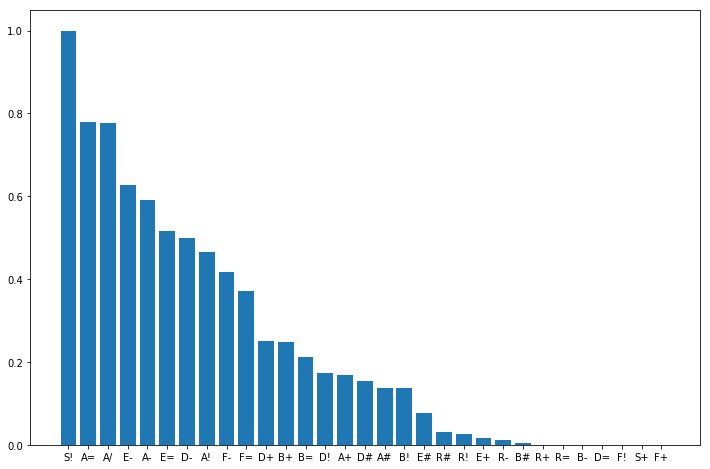

In [60]:
#check how often predictions change from beginning of rally
y_pred = clf.predict(X)
counts_flip = {}
counts_stay = {}
for i in range(1,len(vb)):
    if (vb.ScoreMax[i] == vb.ScoreMax[i-1]) & (vb.ScoreDiff[i] == vb.ScoreDiff[i-1]):
        action_string = (vb.ActionType0[i]+vb.ActionOutcome0[i])
        if not(action_string in counts_flip.keys()):
            counts_flip[action_string] = 0
        if not(action_string in counts_stay.keys()):
            counts_stay[action_string] = 0

        if y_pred[i] != y_pred[i-1]:
            counts_flip[action_string] = counts_flip[action_string] + 1
        else:
            counts_stay[action_string] = counts_stay[action_string] + 1

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
count_ratios = {k: counts_flip[k]/(counts_flip[k]+counts_stay[k]) for k in counts_flip.keys()}
srt_counts = {k: v for k, v in sorted(count_ratios.items(), key=lambda item: item[1], reverse=True)}
plt.bar(srt_counts.keys(), srt_counts.values())

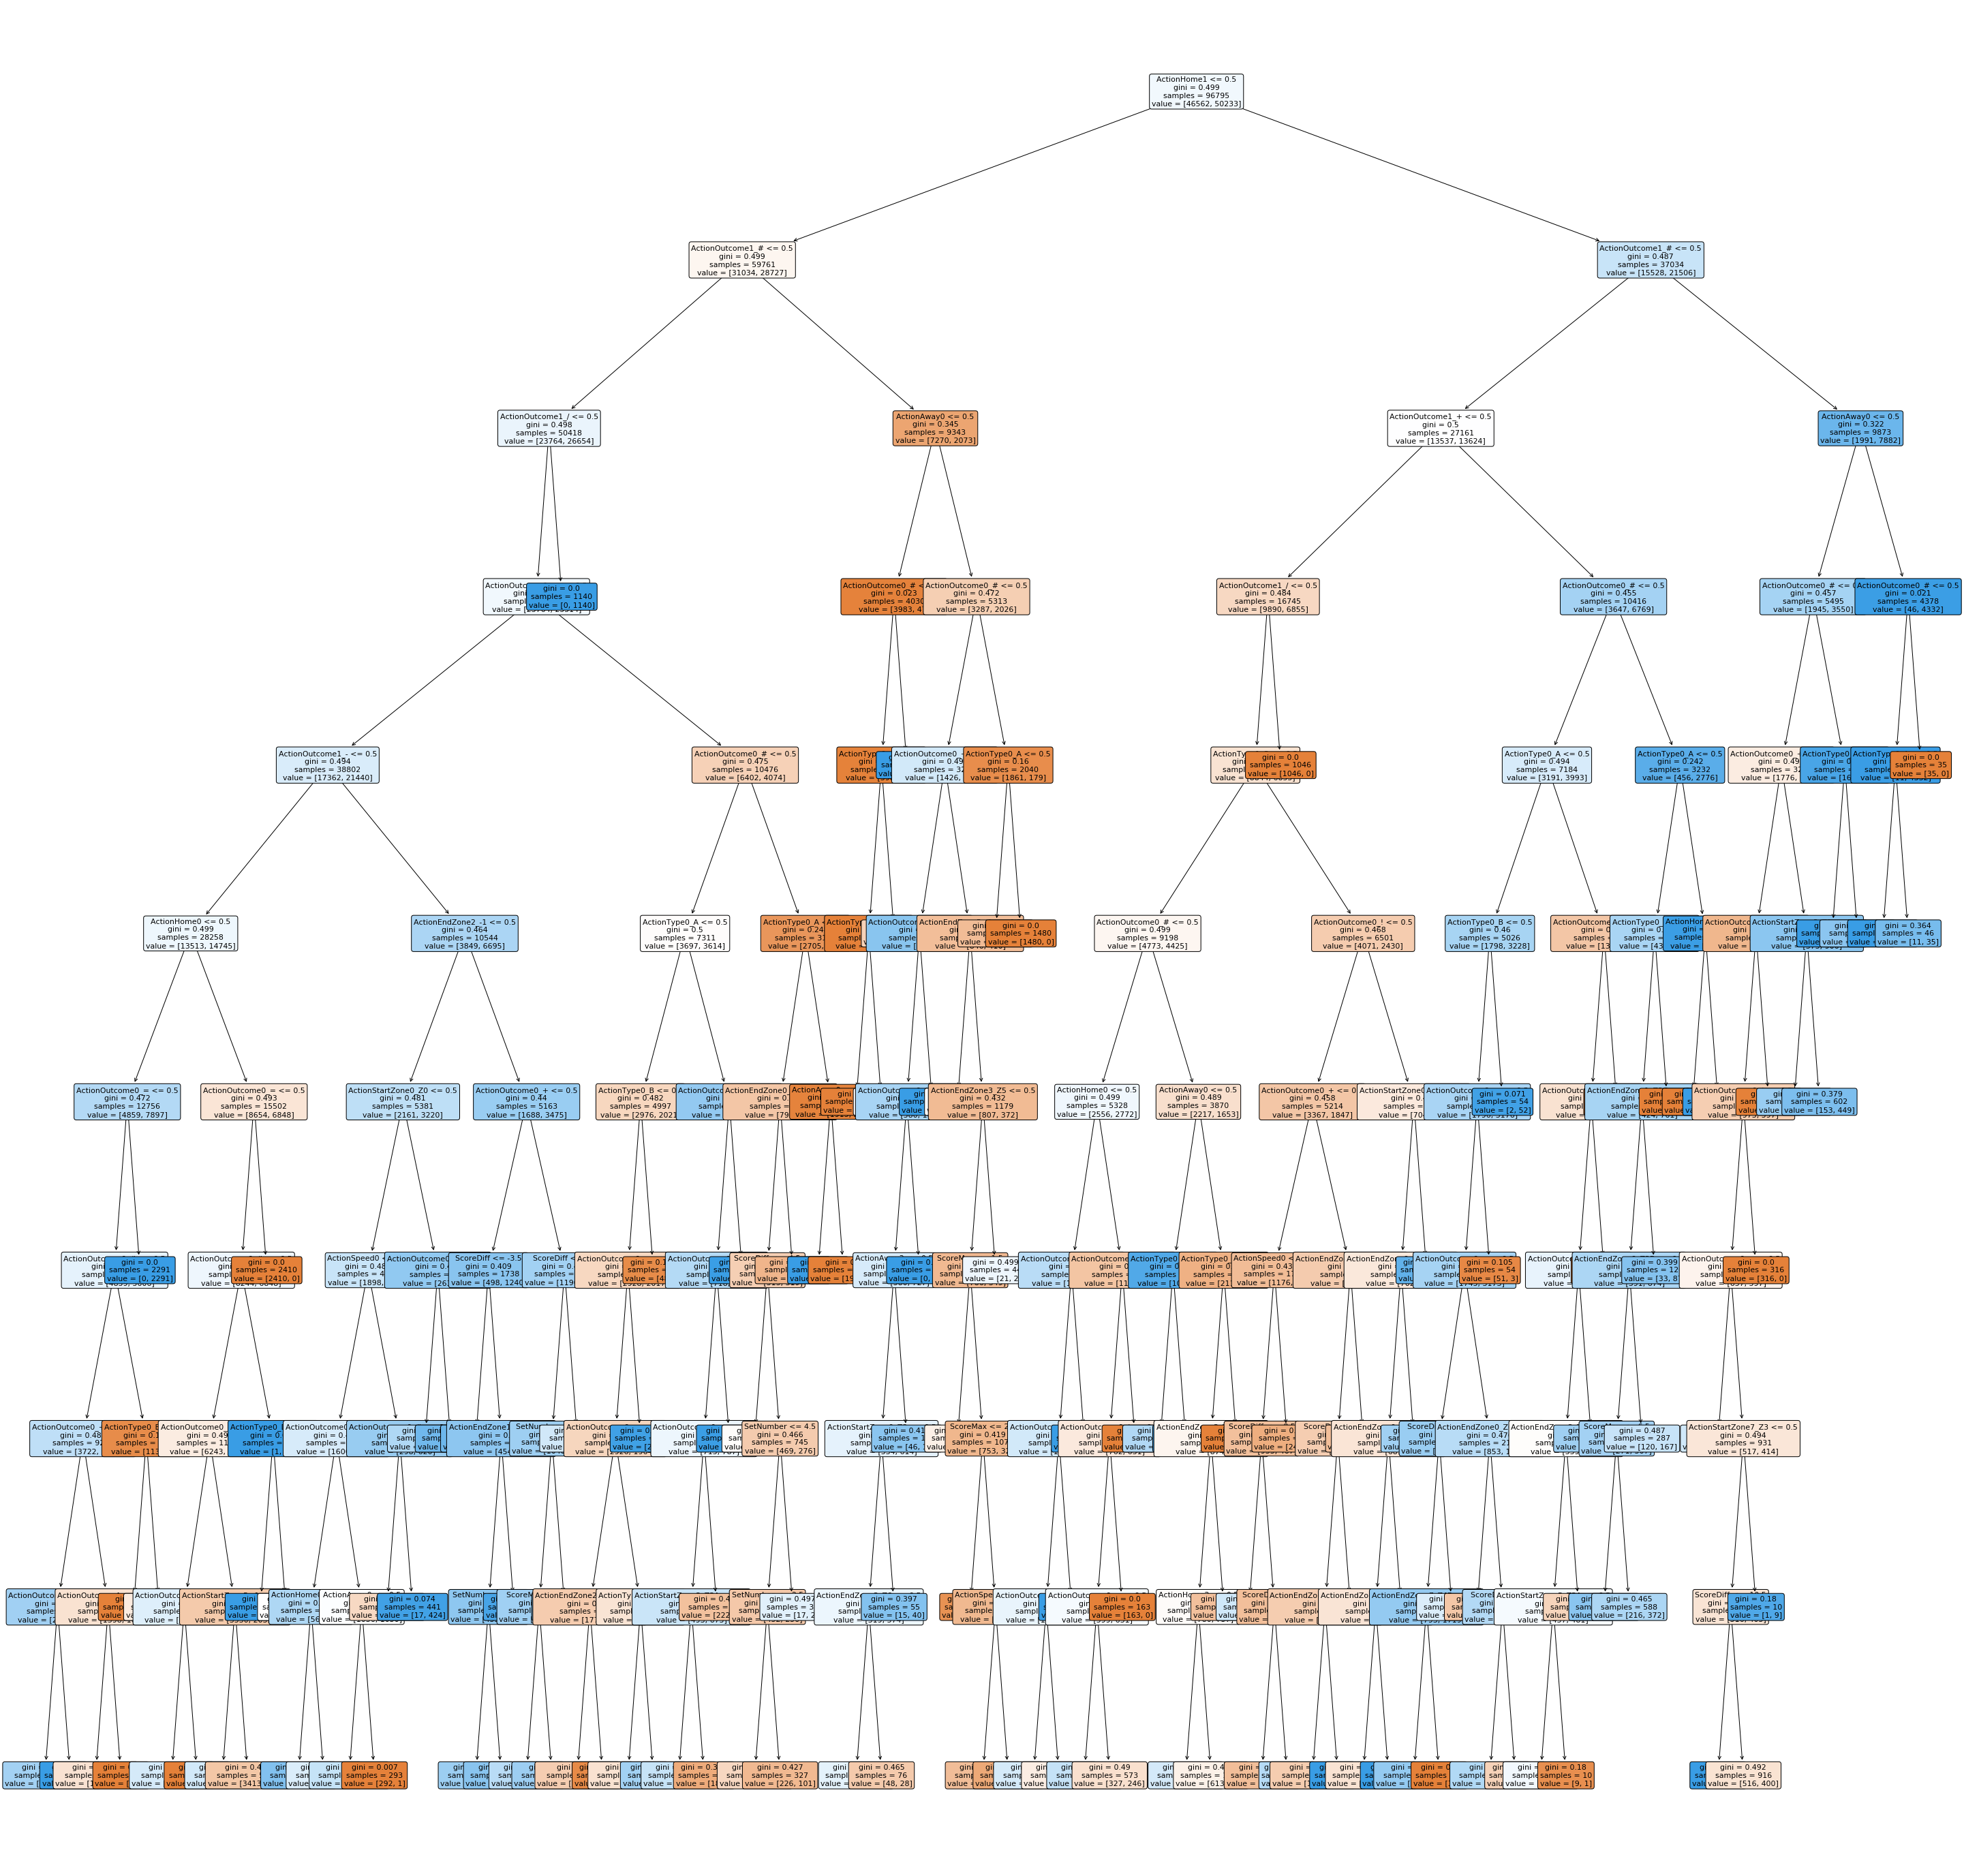

In [21]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,50))
a = plot_tree(clf, feature_names=X.columns, filled=True, rounded=True, fontsize=11)

### Numerical data tests

In [50]:
depth = []
for i in range(200,2000,500):
    print('Checking min_samples_split =', i)
    clf = DecisionTreeClassifier(min_samples_split=i, max_depth=10)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=clf, X=Xn, y=yn, cv=5, n_jobs=4, scoring='neg_mean_squared_error')
    depth.append((i,scores.mean()))
    print('Mean cross validation accuracy:', scores.mean())
#print(depth)

Checking min_samples_split = 200
Mean cross validation accuracy: 0.7451763094830538
Checking min_samples_split = 700
Mean cross validation accuracy: 0.7444710715508388
Checking min_samples_split = 1200
Mean cross validation accuracy: 0.7397329681615885
Checking min_samples_split = 1700
Mean cross validation accuracy: 0.7381718589524136


In [5]:
depth = []
for i in range(8,15):
    print('Checking max_depth =', i)
    clf = DecisionTreeClassifier(max_depth=i)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=clf, X=Xn, y=yn, cv=5, n_jobs=4, scoring='neg_mean_squared_error')
    depth.append((i,scores.mean()))
    print('Mean cross validation accuracy:', scores.mean())
#print(depth)

Checking max_depth = 8
Mean cross validation accuracy: -1.084614857925368
Checking max_depth = 9
Mean cross validation accuracy: -1.034275932899692
Checking max_depth = 10
Mean cross validation accuracy: -1.0208558712769598
Checking max_depth = 11
Mean cross validation accuracy: -1.0214036288942143
Checking max_depth = 12
Mean cross validation accuracy: -1.019596028757275
Checking max_depth = 13
Mean cross validation accuracy: -1.0296473810338924
Checking max_depth = 14
Mean cross validation accuracy: -1.0375350907223555


In [4]:
# Create Decision Tree classifer object
clfn = DecisionTreeClassifier(max_depth=10, min_samples_split=200)
# Train Decision Tree Classifer
clfn = clfn.fit(Xn,yn)
yn_pred = clfn.predict(Xn)
yn_proba = clfn.predict_proba(Xn)[:,1]
q_tree = yn_proba*2 - 1
print("Accuracy:", metrics.accuracy_score(yn, yn_pred))
print("Mean squared error:", metrics.mean_squared_error(yn, q_tree))
print("ROC-AUC:", metrics.roc_auc_score(0.5+0.5*vbn.RewardValue, yn_proba))
print('Cross entropy loss: %.3f' % (metrics.log_loss(0.5+0.5*vbn.RewardValue, yn_proba, eps=1e-4)))

Accuracy: 0.9794522423827456
Mean squared error: 0.04577180816824774
ROC-AUC: 0.9991148283277759
Cross entropy loss: 0.032


In [6]:
import pickle
y_prob = clfn.predict_proba(Xn)
pickle.dump(y_prob, open('../output/y_probabilities_tree.pkl', 'wb'))

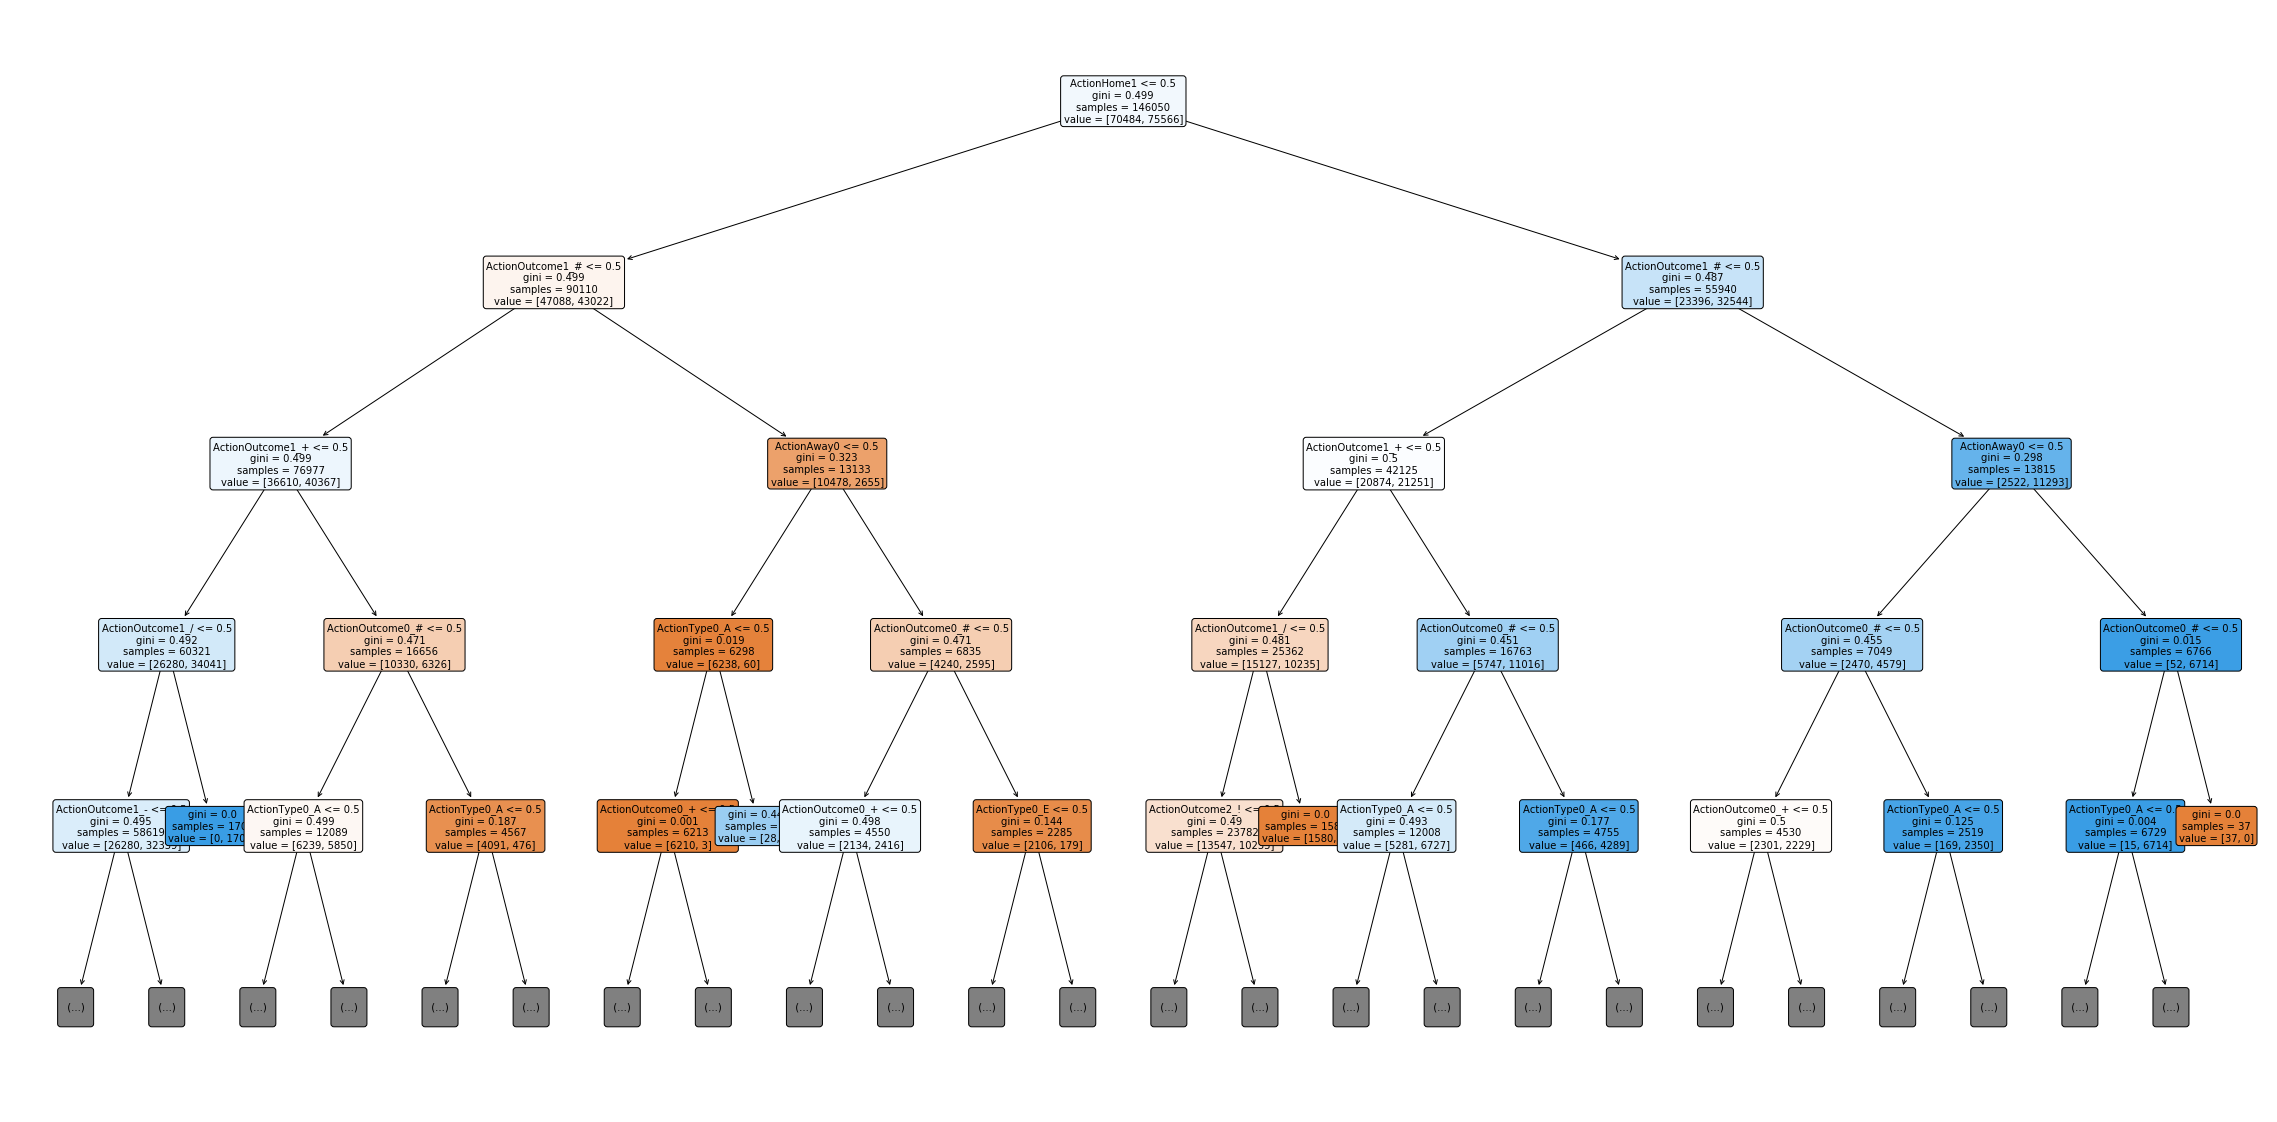

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
a = plot_tree(clfn, feature_names=Xn.columns, filled=True, rounded=True, fontsize=10, max_depth=4)
plt.show()

In [10]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [9]:
for i in range(8,14):
    print('Checking max_depth=', i)
    clf = DecisionTreeRegressor(max_depth=i)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=clf, X=Xn, y=yn, cv=5, n_jobs=2, scoring='neg_mean_squared_error')
    print('Mean cross validation accuracy:', scores.mean())

Checking max_depth = 8
Mean cross validation accuracy: -0.647643183889889
Checking max_depth = 9
Mean cross validation accuracy: -0.630196833049103
Checking max_depth = 10
Mean cross validation accuracy: -0.6248080768112754
Checking max_depth = 11
Mean cross validation accuracy: -0.6259661909908056
Checking max_depth = 12
Mean cross validation accuracy: -0.6335051600824897
Checking max_depth = 13
Mean cross validation accuracy: -0.644845654229264


In [14]:
for i in range(100,700,100):
    print('Checking max_depth=10, min_samples_s', i)
    clf = DecisionTreeRegressor(max_depth=10, min_samples_split=i)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=clf, X=Xn, y=yn, cv=5, n_jobs=2, scoring='neg_mean_squared_error')
    print('Mean cross validation accuracy:', scores.mean())

Checking max_depth=10, min_samples_s 100
Mean cross validation accuracy: -0.6221001379645751
Checking max_depth=10, min_samples_s 200
Mean cross validation accuracy: -0.6219743593868433
Checking max_depth=10, min_samples_s 300
Mean cross validation accuracy: -0.6222982508261821
Checking max_depth=10, min_samples_s 400
Mean cross validation accuracy: -0.6219388322322006
Checking max_depth=10, min_samples_s 500
Mean cross validation accuracy: -0.6230715520459188
Checking max_depth=10, min_samples_s 600
Mean cross validation accuracy: -0.6242787602956601


In [49]:
# Create Decision Tree classifer object
clfn = DecisionTreeRegressor(max_depth=10, min_samples_split=200)
# Train Decision Tree Classifer
clfn = clfn.fit(Xn,yn)
yn_pred = clfn.predict(Xn)
print("Mean squared error:", metrics.mean_squared_error(yn, yn_pred))

Mean squared error: 0.6130547052179504


In [52]:
import pickle
q_values_raw = pickle.load(open('../output/q_values_new.pkl', 'rb'))
q_values = np.asarray([q_values_raw[i,0] for i in range(len(q_values_raw))])
# clipping
q_values[q_values>1] = 1
q_values[q_values<-1] = -1

q_tree = yn_pred
tree_total = 0
nn_total = 0
forest_total = 0
count = 0

zones = list(vb.ActionEndZone0.unique())
for action in ['S']:#,'R','E','A','B','D']:
    for outcome in ['-','#','!','+']:
        print(action, outcome)
        for zone in zones:
            cond0 = (vb['ActionType0']==action) & (vb['ActionHome0']==1) & (vb['ActionOutcome0']==outcome) & (vb['ActionEndZone0']==zone)
            cond1 = (vb['ActionType1']==action) & (vb['ActionHome1']==1) & (vb['ActionOutcome1']==outcome) & (vb['ActionEndZone1']==zone)

            if sum(cond0) != sum(cond1):
                continue

            if sum(cond1) == 0:
                continue

            tree_total += np.mean(np.abs(q_tree[cond1]-q_tree[cond0]))
            nn_total += np.mean(np.abs(q_values[cond1]-q_values[cond0]))
            forest_total += np.mean(np.abs(q_forest[cond1]-q_forest[cond0]))

            count += sum(cond0)

print('Tree:', tree_total)
print('NN:', nn_total)
print('Forest:', forest_total)

S -
S #
S !
S +
Tree: 5.120073917836053
NN: 0.7373293368145823
Forest: 2.763279356916617


In [43]:
q_tree = yn_pred
cond = (vb['ActionType0']=='A') & (vb['ActionHome0']==1) & (vb['ActionOutcome0']=='+') & (vb['ActionStartZone0']=='Z4')
print(np.mean(q_tree[cond]), np.var(q_tree[cond]))
cond = (vb['ActionType1']=='A') & (vb['ActionHome1']==1) & (vb['ActionOutcome1']=='+') & (vb['ActionStartZone1']=='Z4')
print(np.mean(q_tree[cond]), np.var(q_tree[cond]))

0.3795620437956204 0.8559326549096914
0.3795620437956204 0.8559326549096914


In [44]:
cond = (vb['ActionType0']=='A') & (vb['ActionHome0']==1) & (vb['ActionOutcome0']=='+') & (vb['ActionStartZone0']=='Z4')
print(np.mean(q_values[cond]), np.var(q_values[cond]))
cond = (vb['ActionType1']=='A') & (vb['ActionHome1']==1) & (vb['ActionOutcome1']=='+') & (vb['ActionStartZone1']=='Z4')
print(np.mean(q_values[cond]), np.var(q_values[cond]))

0.35700604 0.006231054
0.37254882 0.021834055


In [45]:
q_forest = pickle.load(open('../output/q_forest.pkl', 'rb'))
cond = (vb['ActionType0']=='A') & (vb['ActionHome0']==1) & (vb['ActionOutcome0']=='+') & (vb['ActionStartZone0']=='Z4')
print(np.mean(q_forest[cond]), np.var(q_forest[cond]))
cond = (vb['ActionType1']=='A') & (vb['ActionHome1']==1) & (vb['ActionOutcome1']=='+') & (vb['ActionStartZone1']=='Z4')
print(np.mean(q_forest[cond]), np.var(q_forest[cond]))

0.28229965270130014 0.05142548038867924
0.36580367479578213 0.024207589869814444


In [53]:
metrics.mean_squared_error(vb.RewardValue, q_values)

0.6051516162068039

In [5]:
clf = DecisionTreeRegressor(max_depth=25)
clf.fit(Xn,yn)
q_full_tree = clf.predict(Xn)

In [8]:
import pickle
q_values_raw_2 = pickle.load(open('../output_retry_10/q_values_updated.pkl', 'rb'))
q_values_2 = np.asarray([q_values_raw_2[i,0] for i in range(len(q_values_raw_2))])
# clipping
q_values_2[q_values_2>1] = 1
q_values_2[q_values_2<-1] = -1

In [9]:
for action in ['S','R','A','E','B','D']:
    print('\nSkill:', action)
    
    outcome_regex = '[\+\!\-]'
    if action=='B':
        outcome_regex = '[\+\!]'
    if action=='R':
        outcome_regex = '[\+\!\#\-]'
    
    outcome_cond0 = pd.Series(vb['ActionOutcome0']).str.match(outcome_regex)
    outcome_cond1 = pd.Series(vb['ActionOutcome1']).str.match(outcome_regex)
    
    cond0 = (vb['ActionType0']==action) & (vb['ActionHome0']==1) & (outcome_cond0)
    cond1 = (vb['ActionType1']==action) & (vb['ActionHome1']==1) & (outcome_cond1)

    if sum(cond0) != sum(cond1):
        print(sum(cond0),sum(cond1))
        continue

    if sum(cond1) == 0:
        continue

    tree_total = np.abs(np.mean(q_full_tree[cond1]) - np.mean(q_full_tree[cond0]))
    nn2_total = np.abs(np.mean(q_values_2[cond1]) - np.mean(q_values_2[cond0]))
        
    print('Tree:', tree_total)
    print('NN2:', nn2_total)


Skill: S
Tree: 0.0
NN2: 0.00027813017

Skill: R
Tree: 0.0
NN2: 0.0003836155

Skill: A
Tree: 0.0
NN2: 0.0006117746

Skill: E
Tree: 0.0
NN2: 0.0017817616

Skill: B
Tree: 0.0
NN2: 0.002691485

Skill: D
Tree: 0.0
NN2: 0.012807429


In [10]:
q_full_tree

array([ 0.,  1.,  1., ..., -1., -1., -1.])